In [1]:
import numpy as np
import cv2
from PIL import Image
import pytesseract
import matplotlib.image as img # 이미지 띄워주는 코드
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

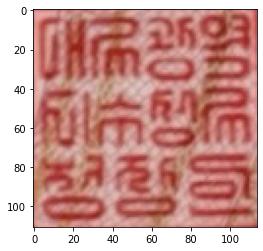

In [4]:
image = cv2.imread('C:\\DevRoot\\Dropbox\\Py27\\10_ComputerVision\\drive.jpg')
# 꼭 사진의 사각형이 선명하게 드러나야 함
def draw_vertices(image):
    
    r = 800.0 / image.shape[0]
    dim = (int(image.shape[1] * r), 800)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(gray, 75, 200)

    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        if len(approx) == 4:
            global screenCnt
            screenCnt = approx
            break

    rect = order_points(screenCnt.reshape(4, 2))
    (topLeft, topRight, bottomRight, bottomLeft) = rect
    # print(rect)
    # 두개의 너비, 높이 계산
    w1 = abs(bottomRight[0] - bottomLeft[0])
    w2 = abs(topRight[0] - topLeft[0])
    h1 = abs(topRight[1] - bottomRight[1])
    h2 = abs(topLeft[1] - bottomLeft[1])

    # # 최대 너비와 최대 높이 계산
    maxWidth = max([w1, w2])
    maxHeight = max([h1, h2])

    # # 반환할 좌표의 위치 초기화
    dat = np.float32([[0, 0], [maxWidth-1, 0], [maxWidth-1, maxHeight-1], [0, maxHeight-1]])
    M = cv2.getPerspectiveTransform(rect, dat)
    warped = cv2.warpPerspective(image.copy(), M, (int(maxWidth), int(maxHeight)), flags=cv2.INTER_CUBIC)

    # # 이미지 띄우기
    cv2.imwrite('image3.jpg', warped)

    # 콘솔에 이미지 띄우기
    image1 = img.imread('image3.jpg')
    plt.imshow(image1)
    plt.show()

    
    # 텍스트 출력
    text = pytesseract.image_to_string('image3.jpg', lang='Hangul')
    print(text)
    
    return warped
    
    
# 꼭지점 자르기
def order_points(pta):
    rect = np.zeros((4, 2), dtype=np.float32)
    
    s = pta.sum(axis = 1)
    rect[0] = pta[np.argmin(s)]
    rect[2] = pta[np.argmax(s)]
    
    diff = np.diff(pta, axis = 1)
    rect[1] = pta[np.argmin(diff)]
    rect[3] = pta[np.argmax(diff)]
    
    return rect

# 이미지 호출
def auto_scan_image():
    image = cv2.imread('C:\\DevRoot\\Dropbox\\Py27\\10_ComputerVision\\min.jpg')
    
    image = draw_vertices(image) 

if __name__ == '__main__':
    auto_scan_image()



In [ ]:
# 노이즈 캔슬링
def noise_canceling(warped):
    
    # 잡음 제거
    warped = cv2.fastNlMeansDenoisingColored(warped, None, 10, 10, 7, 21)
    
    cv2.imwrite('image6.jpg', warped)
    image = img.imread('image6.jpg')
    plt.imshow(image)
    plt.show()
    
    text = pytesseract.image_to_string('image6.jpg', lang='Hangul')
    print(text)
    
    return warped
    
    
image3 = cv2.imread('image3.jpg')
image3 = noise_canceling(image3)

In [ ]:
# 반사광 제거
def remove_reflection(warped):
    hav_image = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hav_image)
    
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
    v = clahe.apply(v)
    
    hav_image = cv2.merge([h, s, v])
    hav_image = cv2.cvtColor(hav_image, cv2.COLOR_HSV2RGB)
    
    cv2.imwrite('image9.jpg', hav_image)
    
    image3 = img.imread('image9.jpg')
    plt.imshow(image3)
    plt.show()
    
    text = pytesseract.image_to_string('image9.jpg', lang='Hangul')
    print(text)
    
    return warped


image = cv2.imread('image3.jpg')
image = remove_reflection(image)
    

In [ ]:
# 노이즈 제거
def noise_removal(warped):
    warped = cv2.medianBlur(warped, ksize = 5)
    
    cv2.imwrite('image12.jpg', warped)
    
    image = img.imread('image12.jpg')
    plt.imshow(image)
    plt.show()

    text = pytesseract.image_to_string('image12.jpg', lang='Hangul')
    print(text)
    
    return warped

    
image12 = cv2.imread('image9.jpg')
image12 = noise_removal(image12)